<a href="https://colab.research.google.com/github/TibehTahmasebi/Two-Proportion-Calculator-App/blob/main/TwoProportionCalculator_Tibeh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter data for group 1:
Number of failures: 23
Total samples tested: 610
Enter data for group 2:
Number of failures: 13
Total samples tested: 930
Enter confidence level (e.g. 90, 95, 99): 95
Difference between two proportions: 0.0237
Confidence interval: (0.0068, 0.0406)
Statistical significance: Yes


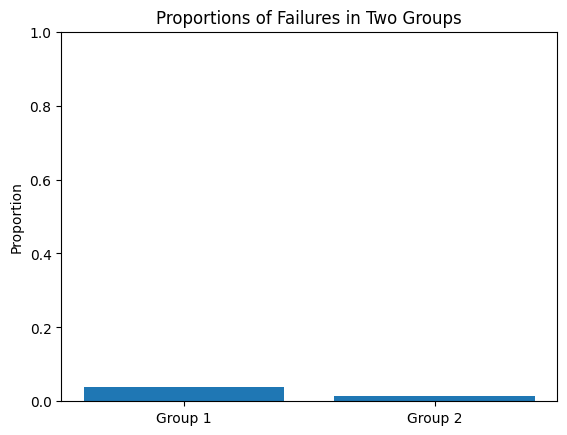

In [ ]:
import math
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Function to calculate the difference between two proportions and its confidence interval
def calculate_prop_diff(conf_level, d1, n1, d2, n2):
    p1 = d1/n1
    p2 = d2/n2
    prop_diff = p1 - p2
    std_error = math.sqrt((p1*(1-p1)/n1) + (p2*(1-p2)/n2))
    z_score = abs(round(stats.norm.ppf((1-conf_level/100)/2), 2))
    margin_error = std_error * z_score
    lower_bound = prop_diff - margin_error
    upper_bound = prop_diff + margin_error
    p_value = 2*(1 - stats.norm.cdf(abs(prop_diff/std_error)))
    return prop_diff, lower_bound, upper_bound, p_value, p1, p2

# Function to plot the two proportions
def plot_props(p1, p2):
    labels = ['Group 1', 'Group 2']
    proportions = [p1, p2]
    plt.bar(labels, proportions)
    plt.ylim([0, 1])
    plt.title('Proportions of Failures in Two Groups')
    plt.ylabel('Proportion')
    plt.show()

# Get user inputs
print("Enter data for group 1:")
d1 = int(input("Number of failures: "))
n1 = int(input("Total samples tested: "))

print("Enter data for group 2:")
d2 = int(input("Number of failures: "))
n2 = int(input("Total samples tested: "))

conf_level = int(input("Enter confidence level (e.g. 90, 95, 99): "))

# Calculate the difference and plot the proportions
prop_diff, lower_bound, upper_bound, p_value, p1, p2 = calculate_prop_diff(conf_level, d1, n1, d2, n2)

if p_value < 0.05:
    print("Difference between two proportions: {:.4f}\nConfidence interval: ({:.4f}, {:.4f})\nStatistical significance: Yes".format(prop_diff, lower_bound, upper_bound))
else:
    print("Difference between two proportions: {:.4f}\nConfidence interval: ({:.4f}, {:.4f})\nStatistical significance: No".format(prop_diff, lower_bound, upper_bound))

plot_props(p1, p2)